# Tensorflow Basics_2
2021_Summer_데이터청년캠퍼스_SWU

#### 간단한 방식의 딥러닝 구현 해보기

##### MNIST 데이터 셋
<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림 1.</b> MNIST 샘플 이미지 <br/>&nbsp;
  </td></tr>
</table>

- 머신 러닝에서 사용되는 가장 기본적인 데이터 셋
- 손글씨로 쓰여진 0~9의 숫자들이 28*28 pixel 크기의 흑백 이미지 데이터로 저장되어 있음

<br>주어진 이미지가 0~9 중 어떤 숫자인지 분류하는 model 을 만드는 것이 목표

(28, 28)
float64
[5 0 4 1 9]
5


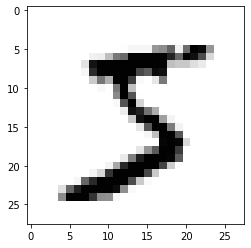

training data: 60000 image
test data: 10000 image


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

# mnist dataset의 tf.keras.datasets.mnist로 쉽게 불러올 수 있음
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# 255로 나누는 이유 흑백을 의미하는 픽셀이 255이기 때문

# x는 이미지, y는 0부터 9까지 각 이미지에 맞는 label
print(x_train[0].shape)
print(x_train[0].dtype)
print(y_train[:5])
print(y_train[0])
plt.imshow(x_train[0], cmap='Greys')
plt.show()

print("training data:",len(x_train),'image')
print('test data:',len(x_test),'image') 

### 모델 선언 및 학습, 평가

- **tf.keras.models.Sequential**:<br>
안에 tf.keras.layers의 layer들로 모델을 구성 작성한 순서대로 input에 각 layer가 적용됨.
-**Flatten(벡터로 변환해주는)**: <br>
 28 * 28의 tensor를 784 size의 tensor로 펴주는 역할
- **Dense**:<br> 
임의의 size의 input을 특정한 size로 mapping 시켜주는 fully connected layer 
- **activation function**으로 relu, softmax 등을 사용할 수 있음
    - softmax: 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수. 분류하고 싶은 클래수의 수 만큼 출력으로 구성한다. 가장 큰 출력 값을 부여받은 클래스가 확률이 가장 높은 것으로 이용
- **Dropout**:<br>
dropout layer의 input에서 각각의 값에 대해, 일정 확률로 0값을 배정함
   - 학습 시에만 적용되며, **test 할때는 적용되지 않음**
   - overfitting을 막아주는 regularizer 역할

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# model.complile에서는 optimizer, loss, metric을 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


- model.fit을 통해, 학습 데이터를 이용하여 학습.

    - validation_split=0.2 : 학습 데이터 중 80%는 학습에 이용하고, 20%는 매 epoch 마지막에 validation에 이용함
    - epoch=5 : 학습 데이터를 총 5번 활용하여 학습함<br>(모든 trainset 을 한번학습한게 1epoch, 2회학습은 2epoch,step이 모여 하나의 epoch가 된다.)
    - verbose=2 : 학습 log의 verbosity를 정하는 값<br>(학습의 진행 상황을 보여줄 것인지 지정)
        - verbose = 1 > progress bar and one line per epoch
        - verbose = 0 > silent
        - verbose = 2 > one line per epoch
- model.evaluate에서 학습된 모델을 이용하여, test 데이터에 대한 성능을 확인

In [6]:
#fit
model.fit(x_train, y_train, validation_split=0.2, epochs=5, verbose=1)

loss, accuracy = model.evaluate(x_test, y_test)
print("test loss : %.3f, test accuracy : %.3f" % (loss, accuracy))

Epoch 1/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0715 - accuracy: 0.9773 - val_loss: 0.0874 - val_accuracy: 0.9750
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0611 - accuracy: 0.9805 - val_loss: 0.0868 - val_accuracy: 0.9742
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0548 - accuracy: 0.9821 - val_loss: 0.0837 - val_accuracy: 0.9752
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0505 - accuracy: 0.9832 - val_loss: 0.0832 - val_accuracy: 0.9776
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0720 - accuracy: 0.9787
test loss : 0.072, test accuracy : 0.979


- 학습된 모델을 이용해서, 이미지에 대한 분류 결과를 출력하는 방법

[[3.1461456e-09 8.7006735e-11 9.8841923e-08 1.0498892e-04 6.3606597e-14
  2.7934937e-09 2.7725936e-14 9.9989092e-01 1.0853669e-08 3.9614806e-06]
 [6.3744413e-12 1.9832222e-04 9.9979407e-01 5.5101218e-06 1.0919279e-21
  1.9407571e-08 5.3237559e-10 1.1400766e-16 2.2031186e-06 6.4430488e-17]
 [3.6339756e-07 9.9882656e-01 1.8642818e-04 7.0744604e-06 1.8937825e-06
  1.9478633e-05 3.3017918e-06 2.4753748e-04 7.0714322e-04 2.4541478e-07]
 [9.9998331e-01 7.4280332e-11 1.0789894e-05 8.3537804e-10 2.5852032e-09
  1.3423270e-09 6.8778419e-08 2.1077037e-06 5.1833533e-09 3.6817842e-06]]
tf.Tensor([7 2 1 0], shape=(4,), dtype=int64)


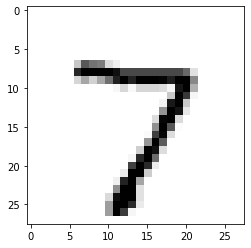

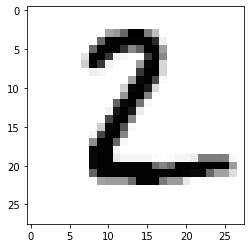

In [7]:
#predict
y_pred = model.predict(x_test)
print(y_pred[:4])
print(tf.argmax(y_pred[:4], axis=-1)) #argmax (max값을 가지고 있는 값을 보여줘라)

plt.imshow(x_test[0], cmap='Greys')
plt.show()
plt.imshow(x_test[1], cmap='Greys')
plt.show()

### tf.data.Dataset
- 일반적으로 데이터를 input으로 사용하기 위해 필요한 절차 (Extract, Transform, Load)
  - **Extract**: 파일로 저장된 데이터를 불러옴 (csv file, numpy file, tfrecord file 등)
  - **Transform**: 원하는 방식으로 전처리하거나, augmentation을 적용해야 하고(이미지 데이터 rotation, 텍스트 데이터 벡터화, 오디오 데이터의 signal process 등), random하게 batch를 구성
  - **Load**: transformed data를 GPU/TPU (accelerator devices)에 올려서 연산

- 위와 같이 복잡한 input pipeline을 간단하게 처리할 수 있도록 지원하는 API

- 가상의 데이터인 x, y 생성
  - x는 총 10개의 2 x 3 data
  - y는 0부터 9까지 총 10개의 integer
  - 총 10개의 x, y가 짝을 이루는 dataset





In [12]:
x = tf.random.normal([10, 2, 3])
y = [i for i in range(10)]

dataset = tf.data.Dataset.from_tensor_slices((x, y))

batch_size = 4 #미니batch의 샘플 갯수(4개씩 묶어 연산을 하겠다.)

print("-----------batched dataset----------- \n")
# dataset.batch() function을 이용하여 dataset을 batch 단위로 나눌 수 있음
# batch size 4의 의미 : 전체 data를 4개씩 묶어서 불러옴
# tensorflow의 dataset은 for문을 통해 data를 불러올 수 있음
batched_dataset = dataset.batch(batch_size)
for batch in batched_dataset:
    print("start of batch")
    x, y = batch
    print("x : ", x)
    print("y : ", y, "\n")

-----------batched dataset----------- 

start of batch
x :  tf.Tensor(
[[[-0.7992225   0.89197505  0.2009767 ]
  [-0.7901152   0.20543109 -1.0116236 ]]

 [[ 0.26237828  1.064081    0.57328844]
  [ 0.543063    1.0090777  -2.1094885 ]]

 [[ 0.24830388  1.7488402   0.37981072]
  [-0.9524916   0.16752975  0.6520094 ]]

 [[ 0.02190679  1.864       1.0813632 ]
  [ 1.2047664   0.4377278   1.7336723 ]]], shape=(4, 2, 3), dtype=float32)
y :  tf.Tensor([0 1 2 3], shape=(4,), dtype=int32) 

start of batch
x :  tf.Tensor(
[[[-0.16508241 -0.55844516 -0.11243976]
  [-0.821655   -1.0297437   0.5257736 ]]

 [[-0.56082505  0.33147338  2.010077  ]
  [-1.4511245   0.6389431  -0.00770784]]

 [[ 1.6369827  -0.32137367  0.9368479 ]
  [ 0.6582555   0.7596243  -0.7683361 ]]

 [[ 1.2403096  -0.20333779 -0.03271111]
  [ 1.6140288   1.8782091  -0.84241885]]], shape=(4, 2, 3), dtype=float32)
y :  tf.Tensor([4 5 6 7], shape=(4,), dtype=int32) 

start of batch
x :  tf.Tensor(
[[[-0.31346607  0.10493883 -3.0405726 ]

- 위 출력 결과의 문제점
  - 전체 data가 순차적으로 구성
  - 학습 데이터는 random하게 batch를 구성하는 것이 필요

- 1 epoch : 전체 데이터를 한번 이용하는 것

- dataset을 shuffle한 후, batch를 나누는 방법: 자동으로 epoch 마다 shuffle
  - buffer_size 만큼 순서대로 가져온 후, 그 안에서 shuffle 후 batch 구성
  - shuffle과 batch의 순서도 중요함
  - 20000장의 이미지가 있는데, 1번에서 10000번 까지는 고양이 이미지, 10001번부터 20000번 까지는 고양이가 아닌 이미지라고 하자.
    - 이 때 buffer_size=1000 이면 일단 1000개의 고양이 이미지를 가져온 후 shuffle, 즉 고양이로만 구성된 batch들을 구성하게 됨
    - 학습이 제대로 이루어지지 않음
  - buffer_size가 1이라면 섞이지 않음
  - 전체 data를 완전히 random하게 만들기 위해서는 buffer_size가 전체 data 개수와 같거나 크게 설정

- 아래 실행 결과를 확인하면, 각 batch의 구성과 data의 순서가 random하게 바뀐 것을 확인할 수 있음 

In [13]:
epochs = 2
buffer_size = 10 #한번에 몇개씩 불러와서 섞을것이냐 

print("-----------shuffled dataset----------- \n")
shuffled_datatset = dataset.shuffle(buffer_size).batch(batch_size)
for epoch in range(epochs):
    print("start of epoch: ", epoch, "\n")
    for batch in shuffled_datatset:
        print("start of batch")
        x, y = batch
        print("x : ", x)
        print("y : ", y, "\n")


-----------shuffled dataset----------- 

start of epoch:  0 

start of batch
x :  tf.Tensor(
[[[ 0.02190679  1.864       1.0813632 ]
  [ 1.2047664   0.4377278   1.7336723 ]]

 [[-0.7992225   0.89197505  0.2009767 ]
  [-0.7901152   0.20543109 -1.0116236 ]]

 [[-1.8176162   0.29406026 -1.6221662 ]
  [ 1.7295386  -0.73004276 -2.719247  ]]

 [[-0.16508241 -0.55844516 -0.11243976]
  [-0.821655   -1.0297437   0.5257736 ]]], shape=(4, 2, 3), dtype=float32)
y :  tf.Tensor([3 0 9 4], shape=(4,), dtype=int32) 

start of batch
x :  tf.Tensor(
[[[ 0.24830388  1.7488402   0.37981072]
  [-0.9524916   0.16752975  0.6520094 ]]

 [[-0.31346607  0.10493883 -3.0405726 ]
  [ 0.97312206  1.029624   -1.8663919 ]]

 [[ 1.6369827  -0.32137367  0.9368479 ]
  [ 0.6582555   0.7596243  -0.7683361 ]]

 [[-0.56082505  0.33147338  2.010077  ]
  [-1.4511245   0.6389431  -0.00770784]]], shape=(4, 2, 3), dtype=float32)
y :  tf.Tensor([2 8 6 5], shape=(4,), dtype=int32) 

start of batch
x :  tf.Tensor(
[[[ 1.2403096  -0

### Transform을 위해, map 함수 활용 
- tf.data.Dataset에서 각각의 데이터에 대해 함수를 일관되게 적용하고 싶은 경우, **dataset.map** 함수를 이용함
- 결과를 보면, 기존 음수였던 값이 절대값 처리되어 양수로 변환된 것을 확인


In [14]:
# tf.abs()를 input에 적용하는 함수
def abs_function(x):
    x = tf.abs(x)
    return x

print("-----------dataset applied absolute function----------- \n")

# lambda x, y의 의미: 모든 x, y에 대해 오른쪽과 같은 함수를 적용하라는 의미
abs_dataset = dataset.map(lambda x, y: (abs_function(x), y))

# take()는 정해진 개수의 데이터를 가져오도록 하는 함수
for x, y in abs_dataset.batch(4).take(1):
    print("x : ", x)
    print("y : ", y, "\n")

-----------dataset applied absolute function----------- 

x :  tf.Tensor(
[[[0.7992225  0.89197505 0.2009767 ]
  [0.7901152  0.20543109 1.0116236 ]]

 [[0.26237828 1.064081   0.57328844]
  [0.543063   1.0090777  2.1094885 ]]

 [[0.24830388 1.7488402  0.37981072]
  [0.9524916  0.16752975 0.6520094 ]]

 [[0.02190679 1.864      1.0813632 ]
  [1.2047664  0.4377278  1.7336723 ]]], shape=(4, 2, 3), dtype=float32)
y :  tf.Tensor([0 1 2 3], shape=(4,), dtype=int32) 



#### tensorflow의 함수를 활용하지 않으면서, map 함수를 활용하는 방법

- 이전 예시에서는 tf function을 이용하였으므로, dataset map 함수가 정상적으로 작동
- 그러나 data에 전처리 또는 augmentation 할 때, tensorflow 함수가 아닌 별도의 패키지를 필요로하는 경우가 많음
- 앞에서와 동일한 구조로, np.abs를 활용하는 함수를 적용하면 아래와 같은 오류가 발생함
- Tensor를 numpy array로 변환할수 없다는 의미

In [15]:
import numpy as np

def numpy_abs_function(x):
    x = np.abs(x)
    return x

try:
    print("-----------dataset applied numpy absolute function----------- \n")
    abs_dataset = dataset.map(lambda x, y: (numpy_abs_function(x), y))
    for x, y in abs_dataset.batch(4).take(1):
        print("x : ", x)
        print("y : ", y, "\n")
except:
    print("=====Failure to use numpy function for dataset map function")

-----------dataset applied numpy absolute function----------- 

=====Failure to use numpy function for dataset map function


- tf.py_function :<br>
일반적인 python function을 tensorflow에 알맞은 function으로 변환
   - input으로 함수, input list, output type을 넣어줌
- 위 함수를 이용하여 변환된 함수를 dataset map에 적용
- 오류 없이 작동하는 것을 확인

In [16]:
# tf.py_function으로 tensorflow 외부 함수를 사용할 수 있게 변환
def tf_numpy_abs_function(x):
    tf_float = tf.py_function(
        numpy_abs_function,
        [x],
        tf.float32
    )
    return tf_float

print("-----------dataset applied numpy absolute function----------- \n")
abs_dataset = dataset.map(lambda x, y: (tf_numpy_abs_function(x), y))
for x, y in abs_dataset.batch(4).take(1):
    print("x : ", x)
    print("y : ", y, "\n")

-----------dataset applied numpy absolute function----------- 

x :  tf.Tensor(
[[[0.7992225  0.89197505 0.2009767 ]
  [0.7901152  0.20543109 1.0116236 ]]

 [[0.26237828 1.064081   0.57328844]
  [0.543063   1.0090777  2.1094885 ]]

 [[0.24830388 1.7488402  0.37981072]
  [0.9524916  0.16752975 0.6520094 ]]

 [[0.02190679 1.864      1.0813632 ]
  [1.2047664  0.4377278  1.7336723 ]]], shape=(4, 2, 3), dtype=float32)
y :  tf.Tensor([0 1 2 3], shape=(4,), dtype=int32) 

